In [29]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import griddata
import pickle
from scipy.ndimage import gaussian_filter

# Configuración de estilo para las gráficas
plt.style.use('default')
plt.rcParams['figure.figsize'] = (8, 4)
plt.rcParams['font.size'] = 8
plt.rcParams['lines.linewidth'] = 1.5
plt.rcParams['font.family'] = 'sans-serif'

# Cargar los puntos y triángulos desde archivos
puntos = np.loadtxt("files/valle_aburra.pts")
triangs = np.loadtxt("files/valle_aburra.tri")

# Extraer las coordenadas x, y y z de los puntos y convertirlas a kilómetros
x = puntos[:, 0] / 1000
y = puntos[:, 1] / 1000
z = puntos[:, 2] / 1000

# Crear una rejilla para interpolar los datos
xs, ys = np.mgrid[min(x):max(x):300j, min(y):max(y):300j]

# Interpolar los valores z en la rejilla
zs = griddata((x, y), z, (xs, ys), method='nearest')

# Suavizar los datos utilizando un filtro gaussiano
sigma = 1.5  # Puedes ajustar este valor para cambiar el grado de suavizado
zs = gaussian_filter(zs, sigma=sigma)

# Guardar xs, ys y zs en archivos de texto separados usando NumPy
np.savetxt('files/xs.txt', xs)
np.savetxt('files/ys.txt', ys)
np.savetxt('files/zs.txt', zs)


In [15]:
zs

array([[2.82, 2.82, 2.74, ..., 2.58, 2.45, 2.55],
       [2.82, 2.78, 2.75, ..., 2.59, 2.51, 2.6 ],
       [2.76, 2.7 , 2.62, ..., 2.57, 2.59, 2.62],
       ...,
       [2.52, 2.53, 2.5 , ..., 1.75, 1.75, 1.8 ],
       [2.49, 2.53, 2.5 , ..., 1.75, 1.75, 1.84],
       [2.5 , 2.5 , 2.49, ..., 1.64, 1.7 , 1.87]])

# Descripción de los datos de entrada

- **files/xs.txt**: Este archivo contiene los valores de la coordenada $ x $ en una rejilla 2D de tamaño $ 300 \times 300 $ km. Los valores están organizados en un formato de matriz $ \mathbf{X} $, donde cada fila $ i $ representa una línea de la rejilla en la dirección $ x $:
  $$
  \mathbf{X} = 
  \begin{bmatrix}
  x_{11} & x_{12} & \cdots & x_{1j} \\
  x_{21} & x_{22} & \cdots & x_{2j} \\
  \vdots & \vdots & \ddots & \vdots \\
  x_{i1} & x_{i2} & \cdots & x_{ij}
  \end{bmatrix}
  $$
  donde $ x_{ij} $ son los valores de la coordenada $ x $ en la posición $ (i, j) $.

- **files/ys.txt**: Este archivo contiene los valores de la coordenada $ y $ en una rejilla 2D de tamaño $ 300 \times 300 $ km. Similar al archivo xs.txt, los valores están organizados en un formato de matriz $ \mathbf{Y} $, donde cada columna $ j $ representa una línea de la rejilla en la dirección $ y $:
  $$
  \mathbf{Y} = 
  \begin{bmatrix}
  y_{11} & y_{12} & \cdots & y_{1j} \\
  y_{21} & y_{22} & \cdots & y_{2j} \\
  \vdots & \vdots & \ddots & \vdots \\
  y_{i1} & y_{i2} & \cdots & y_{ij}
  \end{bmatrix}
  $$
  donde $ y_{ij} $ son los valores de la coordenada $ y $ en la posición $ (i, j) $.

- **files/zs.txt**: Este archivo contiene los valores interpolados de la coordenada $ z $ en la rejilla 2D de tamaño $ 300 \times 300 $ km definida por $ \mathbf{X} $ y $ \mathbf{Y} $. Los valores están organizados en un formato de matriz $ \mathbf{Z} $, donde cada elemento $ z_{ij} $ representa la altitud interpolada en la posición correspondiente de la rejilla:
  $$
  \mathbf{Z} = 
  \begin{bmatrix}
  z_{11} & z_{12} & \cdots & z_{1j} \\
  z_{21} & z_{22} & \cdots & z_{2j} \\
  \vdots & \vdots & \ddots & \vdots \\
  z_{i1} & z_{i2} & \cdots & z_{ij}
  \end{bmatrix}
  $$
  donde $ z_{ij} $ son los valores interpolados de la coordenada $ z $ en la posición $ (i, j) $.



In [401]:
# Cargar xs, ys y zs desde los archivos de texto usando NumPy
xs = np.loadtxt('files/xs.txt')
ys = np.loadtxt('files/ys.txt')
zs = np.loadtxt('files/zs.txt')

# muestra el tamaño de las matrices
print(xs.shape, ys.shape, zs.shape)

(300, 300) (300, 300) (300, 300)


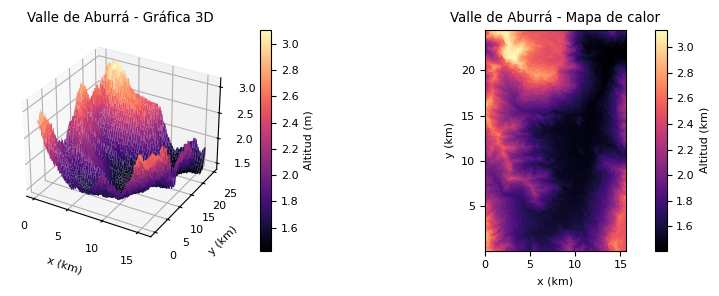

In [392]:
# Crear la figura y los subplots
fig = plt.figure(figsize=(10, 3))

# Subplot 1: Gráfica 3D
ax1 = fig.add_subplot(121, projection='3d')
surf = ax1.plot_surface(xs, ys, zs, cmap='magma')
fig.colorbar(surf, ax=ax1, label='Altitud (m)')
ax1.set_xlabel('x (km)')
ax1.set_ylabel('y (km)')
ax1.set_title('Valle de Aburrá - Gráfica 3D')
plt.tight_layout()

# Subplot 2: Mapa de calor
ax2 = fig.add_subplot(122)
heatmap = ax2.imshow(zs.T, extent=(np.min(xs), np.max(xs), np.min(ys), np.max(ys)), origin='lower', cmap='magma')
fig.colorbar(heatmap, ax=ax2, label='Altitud (km)')
ax2.set_xlabel('x (km)')
ax2.set_ylabel('y (km)')
ax2.set_title('Valle de Aburrá - Mapa de calor')
plt.tight_layout()
# Mostrar la figura con los subplots
plt.show()

# Gradiente a través del método de diferencias finitas

La función `gradiente` calcula los gradientes numéricos de un campo escalar, que en esta caso son elevaciones (en km). Representado por una matriz 2D llamada $ \text{zs} $. Se utiliza el métodos númerico de diferencias finitas. Los gradientes se calculan en ambas direcciones, $ x $ e $ y $.

## Entradas

- $ \text{zs} $: Una matriz 2D que representa el campo escalar (valores de elevación).
- $ dx $: El tamaño del paso espacial en la dirección $ x $.
- $ dy $: El tamaño del paso espacial en la dirección $ y $.

## Salidas

- $ dzdx $ y $ dzdy $: Matrices 2D que representan el gradiente de $ z $ con respecto a $ x $ y $ y $ (es decir, $ \frac{\partial z}{\partial x} $ y $ \frac{\partial z}{\partial y} $).

## Formulación Matemática

1. **Gradiente en la dirección $ x $**:
   Para cada punto $ (i, j) $ donde $ i $ es el índice de la fila y $ j $ es el índice de la columna:
   $$
   \frac{\partial z}{\partial x} \approx \frac{z_{i,j+1} - z_{i,j-1}}{2 \cdot dx}
   $$
   Esto utiliza la fórmula de la diferencia central para puntos que no están en el límite.

   Para los puntos en los bordes:
   - Borde izquierdo $ (j = 0) $:
     $$
     \frac{\partial z}{\partial x} \approx \frac{z_{i,1} - z_{i,0}}{dx}
     $$
   - Borde derecho $ (j = \text{cols}-1) $:
     $$
     \frac{\partial z}{\partial x} \approx \frac{z_{i,\text{cols}-1} - z_{i,\text{cols}-2}}{dx}
     $$

2. **Gradiente en la dirección $ y $**:
   Para cada punto $ (i, j) $:
   $$
   \frac{\partial z}{\partial y} \approx \frac{z_{i+1,j} - z_{i-1,j}}{2 \cdot dy}
   $$
   Para los puntos en los bordes:
   - Borde superior $ (i = 0) $:
     $$
     \frac{\partial z}{\partial y} \approx \frac{z_{1,j} - z_{0,j}}{dy}
     $$
   - Borde inferior $ (i = \text{rows}-1) $:
     $$
     \frac{\partial z}{\partial y} \approx \frac{z_{\text{rows}-1,j} - z_{\text{rows}-2,j}}{dy}
     $$



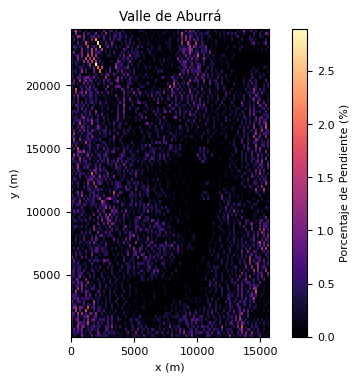

In [329]:
 
dx = np.diff(grid_x[:,:-1],axis=0)
dy = np.diff(grid_y[:-1,:],axis=1)
dz_0 = np.diff(grid_z[:,:-1],axis=0)
dz_1 = np.diff(grid_z[:-1,:],axis=1)
dzdx = np.abs(dz_0/dx)
dzdy = np.abs(dz_1/dy)
norma = dzdx + dzdy

# Plot the heatmap
plt.imshow(dzdx.T, extent=(min(x), max(x), min(y), max(y)), origin='lower', cmap='magma')
plt.colorbar(label='Porcentaje de Pendiente (%)')
plt.xlabel('x (m)')
plt.ylabel('y (m)')
plt.title('Valle de Aburrá')
plt.show() 

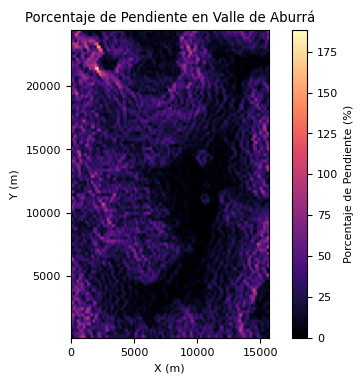

In [353]:
[dzdx, dzdy] = np.gradient(grid_z,dx,dy)
 
# magnitude of the gradient
magnitud = np.sqrt(dzdx**2 + dzdy**2) 
 
# Plot the heatmap
plt.imshow(magnitud.T*100, extent=(min(x), max(x), min(y), max(y)), origin='lower', cmap='magma')
plt.colorbar(label='Porcentaje de Pendiente (%)')
plt.xlabel('X (m)')
plt.ylabel('Y (m)')
plt.title('Porcentaje de Pendiente en Valle de Aburrá')
plt.show()

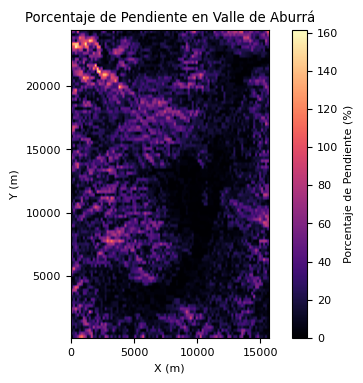

In [347]:
def custom_gradient(grid_z, dx, dy):
    """
    Calcula los gradientes absolutos de grid_z usando diferencias finitas.

    Parámetros:
    grid_z (ndarray): Matriz de valores z interpolados.
    dx (float): Tamaño del paso en la dirección x.
    dy (float): Tamaño del paso en la dirección y.

    Retorna:
    tuple: Gradientes absolutos en las direcciones x e y.
    """
    dzdx = np.zeros_like(grid_z)
    dzdy = np.zeros_like(grid_z)
    
    # Calcular gradiente en la dirección x
    dzdx[:, 1:-1] = (grid_z[:, 2:] - grid_z[:, :-2]) / (2 * dx)
    dzdx[:, 0] = (grid_z[:, 1] - grid_z[:, 0]) / dx
    dzdx[:, -1] = (grid_z[:, -1] - grid_z[:, -2]) / dx
    
    # Calcular gradiente en la dirección y
    dzdy[1:-1, :] = (grid_z[2:, :] - grid_z[:-2, :]) / (2 * dy)
    dzdy[0, :] = (grid_z[1, :] - grid_z[0, :]) / dy
    dzdy[-1, :] = (grid_z[-1, :] - grid_z[-2, :]) / dy
    
    return np.abs(dzdx), np.abs(dzdy)

def plot_slope_percentage(grid_z, x, y, dx, dy):
    """
    Calcula los gradientes absolutos de grid_z y genera un mapa de calor del porcentaje de pendiente en la dirección y.

    Parámetros:
    grid_z (ndarray): Matriz de valores z interpolados.
    x (ndarray): Coordenadas x.
    y (ndarray): Coordenadas y.
    dx (float): Tamaño del paso en la dirección x.
    dy (float): Tamaño del paso en la dirección y.
    """
    # Calcular los gradientes absolutos usando la función custom_gradient
    dzdx, dzdy = custom_gradient(grid_z, dx, dy)
    
    # Plotear el mapa de calor
    plt.imshow(dzdx.T * 100, extent=(min(x), max(x), min(y), max(y)), origin='lower', cmap='magma')
    plt.colorbar(label='Porcentaje de Pendiente (%)')
    plt.xlabel('X (m)')
    plt.ylabel('Y (m)')
    plt.title('Porcentaje de Pendiente en Valle de Aburrá')
    plt.show()

# Ejemplo de uso
# Suponiendo que grid_z, x, y, dx, y dy ya están definidos
plot_slope_percentage(grid_z, x, y, dx, dy)
